<a href="https://colab.research.google.com/github/OmarMohammed88/GPA_Prediction/blob/master/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import numpy.ma as ma


In [0]:
data=pd.read_csv('DATA1.csv')


<p>Display all Data </p>

In [0]:
def display_all(data):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(data)

In [0]:
data1=data.drop(data.index[0:10])

<p style="color:blue"> Drop Timestamp and GPA columns From Excel Sheet</p>



In [0]:
data1=data1.drop('Timestamp', axis=1)
#data1=data1.drop('GPA :', axis=1) Without Label

In [0]:
 X=np.array(data1[0:])


<h2>Covariance Matrix and Mean


In [0]:
cov=np.cov(X,y=None, rowvar=False, bias=False, ddof=None, fweights=None, aweights=None)
mean=np.mean(X,axis=0)

<p color='blue'> Generating New Data from Old Distribution Data </p>

In [56]:
 New_Data= np.random.multivariate_normal(mean, cov,243)
New_Data

array([[ 2.38051087e+00,  1.52926409e+02,  2.93984114e+00,
         2.84516287e+00],
       [ 2.92489963e+00,  1.15206822e+02,  2.44771354e+00,
         2.96090533e+00],
       [ 2.10617051e+00,  1.16535233e+02,  5.95152217e+00,
         4.24192908e+00],
       [ 3.18471156e+00,  1.71754443e+02,  5.92889666e+00,
         4.48347665e+00],
       [ 2.73169039e+00,  1.42464971e+02,  5.17549892e+00,
         4.00313349e+00],
       [ 2.48418289e+00,  1.86084959e+02,  5.91853979e+00,
         4.04785810e+00],
       [ 2.30100852e+00,  1.38547554e+02,  7.37844304e+00,
         3.80588592e+00],
       [ 2.64183819e+00,  2.48266982e+02,  4.01750857e+00,
         3.84738019e+00],
       [ 3.33492922e+00,  2.64592703e+02,  2.64621080e+00,
         4.39764313e+00],
       [ 2.68755045e+00,  6.81775854e+01,  5.19682609e+00,
         4.02688492e+00],
       [ 2.86301498e+00,  1.55047618e+02,  4.27093417e+00,
         4.45872723e+00],
       [ 2.10340161e+00,  1.81579813e+02,  7.20733866e+00,
      

<h3 color='red'> Ploting Old Data and New Data</h3>

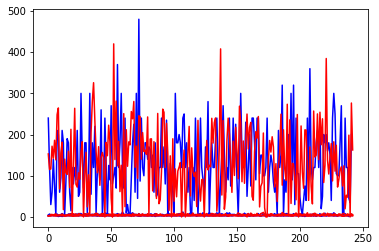

In [57]:
New_Data[New_Data < 0] = 0
plt.plot(X,color='blue')
plt.plot(New_Data,color='r')
plt.show()

<h4> This Function Delete rows whose Values =0</h4>

In [58]:
#Function Clean Data Whose Values Are 0
def Delete_Zeros(New_Data):
  index=[]
  for i in New_Data :
    if np.count_nonzero(i == 0) > 0 or np.count_nonzero(i ==( 0)):
        index.append(np.where(np.all(New_Data==i,axis=1))[0][0])
  cleaned_data=np.delete(New_Data,index,0) 
  return cleaned_data

Cleaned_data1=Delete_Zeros(New_Data)
Cleaned_data1

array([[  2.38051087, 152.92640942,   2.93984114,   2.84516287],
       [  2.92489963, 115.20682221,   2.44771354,   2.96090533],
       [  2.10617051, 116.53523254,   5.95152217,   4.24192908],
       [  3.18471156, 171.75444269,   5.92889666,   4.48347665],
       [  2.73169039, 142.46497144,   5.17549892,   4.00313349],
       [  2.48418289, 186.08495858,   5.91853979,   4.0478581 ],
       [  2.30100852, 138.54755425,   7.37844304,   3.80588592],
       [  2.64183819, 248.2669821 ,   4.01750857,   3.84738019],
       [  3.33492922, 264.59270272,   2.6462108 ,   4.39764313],
       [  2.68755045,  68.17758535,   5.19682609,   4.02688492],
       [  2.86301498, 155.04761774,   4.27093417,   4.45872723],
       [  2.10340161, 181.57981273,   7.20733866,   4.62023989],
       [  3.51156773,  17.71522542,   4.99177073,   3.68361764],
       [  2.62105587, 140.26575146,   1.6791037 ,   3.78222179],
       [  2.04036346, 107.45581854,   4.40614115,   4.50312775],
       [  3.12249196, 103

In [59]:
#function Delete rows whose values >6 Days
def constrains_per_day(cleaned_data1):
  x=[]
  for i in range(len(cleaned_data1)):
    if cleaned_data1[i][3]>6:
      x.append(i)  
  cleaned_data2=np.delete(cleaned_data1,x,0)
  return cleaned_data2
Cleaned_data2=constrains_per_day(Cleaned_data1)

Cleaned_data2

array([[  2.38051087, 152.92640942,   2.93984114,   2.84516287],
       [  2.92489963, 115.20682221,   2.44771354,   2.96090533],
       [  2.10617051, 116.53523254,   5.95152217,   4.24192908],
       [  3.18471156, 171.75444269,   5.92889666,   4.48347665],
       [  2.73169039, 142.46497144,   5.17549892,   4.00313349],
       [  2.48418289, 186.08495858,   5.91853979,   4.0478581 ],
       [  2.30100852, 138.54755425,   7.37844304,   3.80588592],
       [  2.64183819, 248.2669821 ,   4.01750857,   3.84738019],
       [  3.33492922, 264.59270272,   2.6462108 ,   4.39764313],
       [  2.68755045,  68.17758535,   5.19682609,   4.02688492],
       [  2.86301498, 155.04761774,   4.27093417,   4.45872723],
       [  2.10340161, 181.57981273,   7.20733866,   4.62023989],
       [  3.51156773,  17.71522542,   4.99177073,   3.68361764],
       [  2.62105587, 140.26575146,   1.6791037 ,   3.78222179],
       [  2.04036346, 107.45581854,   4.40614115,   4.50312775],
       [  3.12249196, 103

In [60]:
#This function delete rows whose Values >10 hours
def constrains_per_hours(Cleaned_data2):
  x=[]
  for i in range(len(Cleaned_data2)):
    if Cleaned_data2[i][2]>10:
      x.append(i)  
  cleaned_data3=np.delete(Cleaned_data2,x,0)
  return cleaned_data3

Cleaned_data3=constrains_per_hours(Cleaned_data2)

Cleaned_data3

array([[  2.38051087, 152.92640942,   2.93984114,   2.84516287],
       [  2.92489963, 115.20682221,   2.44771354,   2.96090533],
       [  2.10617051, 116.53523254,   5.95152217,   4.24192908],
       [  3.18471156, 171.75444269,   5.92889666,   4.48347665],
       [  2.73169039, 142.46497144,   5.17549892,   4.00313349],
       [  2.48418289, 186.08495858,   5.91853979,   4.0478581 ],
       [  2.30100852, 138.54755425,   7.37844304,   3.80588592],
       [  2.64183819, 248.2669821 ,   4.01750857,   3.84738019],
       [  3.33492922, 264.59270272,   2.6462108 ,   4.39764313],
       [  2.68755045,  68.17758535,   5.19682609,   4.02688492],
       [  2.86301498, 155.04761774,   4.27093417,   4.45872723],
       [  2.10340161, 181.57981273,   7.20733866,   4.62023989],
       [  3.51156773,  17.71522542,   4.99177073,   3.68361764],
       [  2.62105587, 140.26575146,   1.6791037 ,   3.78222179],
       [  2.04036346, 107.45581854,   4.40614115,   4.50312775],
       [  3.12249196, 103

In [0]:
#This function delete rows whose values <5 min and >300 min
def constrains_per_min_Road(Cleaned_data3):
  x=[]
  for i in range(len(Cleaned_data3)):
    if Cleaned_data3[i][1]<5 or Cleaned_data3[i][0]>300:
      x.append(i)  
  cleaned_data4=np.delete(Cleaned_data3,x,0)
  return cleaned_data4

Final_Data=constrains_per_min_Road(Cleaned_data3)


<h1 color="blue">Ploting The New Data After Cleaning and Old Data</h1>

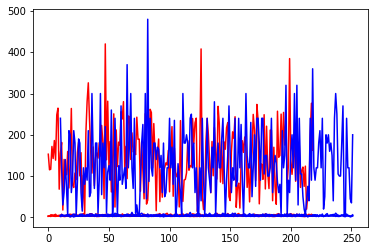

In [62]:
plt.plot(Final_Data,color='r')
plt.plot(data1,color='blue')
plt.show()